In [11]:
import pandas as pd
import numpy as np
import matplotlib.dates as mdates
import matplotlib.pyplot as plt
import glob as gb
import os

%matplotlib inline

In [12]:
sample = "T16"

df = pd.DataFrame()

# Get list of folders
folders = gb.glob("Data/" + sample + "/*/")
for folder in folders:
#     print(file)
    
    # Load HDF file
    df_file = pd.read_csv(folder + '/analysis.csv')
    
    # Add sweep data to measurement dataframe
    df = df.append(df_file)
    
# Sort rows by datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()
df = df.reset_index()
df.head()

,datetime,Unnamed: 0,chip,concentration,fs,humidity,medium,sample_no,sweep_no,sweeps,tempC,timeID,tau
0,2016-05-26 09:26:57.296078,0,T16,NaN,0.0001,40.2,Air,1000,0,600,23.75,1.464251e+09,10.744275
1,2016-05-26 09:26:57.629097,1,T16,NaN,0.0001,40.2,Air,1000,1,600,23.75,1.464251e+09,10.741187
2,2016-05-26 09:26:57.853110,2,T16,NaN,0.0001,40.2,Air,1000,2,600,23.75,1.464251e+09,10.739263
3,2016-05-26 09:26:58.003118,3,T16,NaN,0.0001,40.2,Air,1000,3,600,23.75,1.464251e+09,10.744522
4,2016-05-26 09:26:58.153127,4,T16,NaN,0.0001,40.2,Air,1000,4,600,23.75,1.464251e+09,10.735839


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6600 entries, 0 to 6599
Data columns (total 13 columns):
datetime         6600 non-null datetime64[ns]
Unnamed: 0       6600 non-null int64
chip             6600 non-null object
concentration    6000 non-null float64
fs               6600 non-null float64
humidity         6600 non-null float64
medium           6600 non-null object
sample_no        6600 non-null int64
sweep_no         6600 non-null int64
sweeps           6600 non-null int64
tempC            6600 non-null float64
timeID           6600 non-null float64
tau              6600 non-null float64
dtypes: datetime64[ns](1), float64(6), int64(4), object(2)
memory usage: 670.4+ KB


In [ ]:
sample = "T16"

df = pd.DataFrame()

# Get list of folders
folders = gb.glob("Data/" + sample + "/*/")
for folder in folders:
#     print(file)
    
    # Load HDF file
    df_file = pd.read_csv(folder + '/analysis.csv')
    
    # Add sweep data to measurement dataframe
    df = df.append(df_file)
    
# Sort rows by datetime
df['datetime'] = pd.to_datetime(df['datetime'])
df = df.set_index('datetime').sort_index()
df = df.reset_index()
df.head()

In [41]:
df_file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 13 columns):
Unnamed: 0       600 non-null int64
datetime         600 non-null object
chip             600 non-null object
concentration    600 non-null float64
fs               600 non-null float64
humidity         600 non-null float64
medium           600 non-null object
sample_no        600 non-null int64
sweep_no         600 non-null int64
sweeps           600 non-null int64
tempC            600 non-null float64
timeID           600 non-null float64
tau              600 non-null float64
dtypes: float64(6), int64(4), object(3)
memory usage: 61.0+ KB


In [51]:


sample = "T16"

df = pd.DataFrame()

conc = []
tau = []
tau1 = []
# Get list of folders
folders = gb.glob("Data/" + sample + "/*/")
for folder in folders:
#     print(file)
    
    # Load HDF file
    df_file = pd.read_csv(folder + '/analysis.csv')
    
    conc.append(df_file.mean()['concentration'])
    tau.append(df_file.mean()['tau'])
    tau1.append(df_file.std()['tau'])

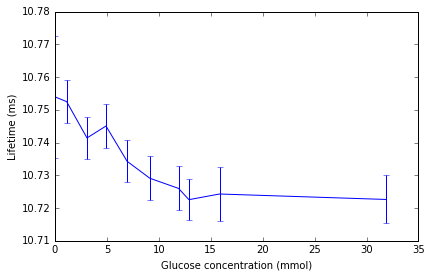

In [58]:
plt.errorbar(conc, tau, yerr=tau1)
plt.xlabel('Glucose concentration (mmol)')
plt.ylabel('Lifetime (ms)')
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')
# plt.xlim([-1, 35])
plt.savefig("Data/" + sample + '/concVsLifetimeError.png', dpi=1000)

In [34]:
 dfn = df[['concentration', 'tau']].groupby(['concentration'])

In [35]:
dfn.tail()

,concentration,tau
595,NaN,10.738270
596,NaN,10.743101
597,NaN,10.744497
598,NaN,10.740510
599,NaN,10.742535
1195,0.000,10.765352
1196,0.000,10.772659
1197,0.000,10.771481
1198,0.000,10.758040
1199,0.000,10.772382


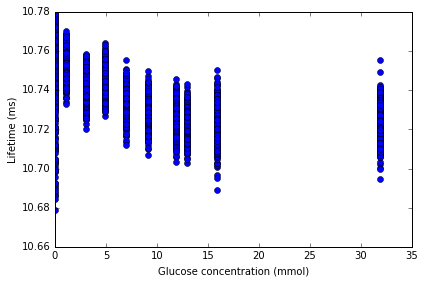

In [14]:
plt.plot(df['concentration'], df['tau'], 'o')
plt.xlabel('Glucose concentration (mmol)')
plt.ylabel('Lifetime (ms)')
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

plt.savefig("Data/" + sample + '/concVsLifetime.png', dpi=1000)

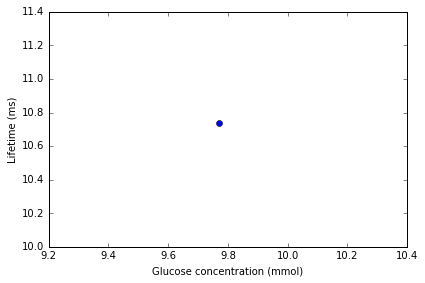

In [17]:
plt.plot(np.mean(df['concentration']), np.mean(df['tau']), 'o')
plt.xlabel('Glucose concentration (mmol)')
plt.ylabel('Lifetime (ms)')
plt.tight_layout()
plt.ticklabel_format(useOffset=False, axis='y')

# plt.savefig("Data/" + sample + '/concVsLifetime.png', dpi=1000)

KeyError: 'datetime'

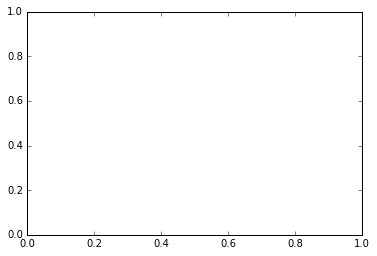

In [10]:
fig, ax = plt.subplots()
ax.plot(df['datetime'], df['tau'], 'o', alpha=0.3)

ax2 = ax.twinx()
ax2.plot(df['datetime'], df['concentration'], 'r.')

# format the x ticks
ax.xaxis.set_major_locator(mdates.MinuteLocator(np.arange(0,60,10)))
ax.xaxis.set_major_formatter(mdates.DateFormatter('%H:%M'))
# ax.xaxis.set_minor_locator(mdates.SecondLocator(bysecond=np.arange(0, 60, 10)))

ax.grid(True)
fig.autofmt_xdate()

plt.xlabel('Time (H:M)')
ax.set_ylabel('Lifetime (ms)')
ax2.set_ylabel('Glucose concentration (mmol)')
plt.tight_layout()

plt.savefig("Data/" + sample + '/conc_lifetimeVsTime.png', dpi=1000)

In [7]:
df = df.set_index('datetime')
df.head()

,Unnamed: 0,chip,concentration,fs,humidity,medium,sample_no,sweep_no,sweeps,tempC,timeID,tau
datetime,,,,,,,,,,,,
2016-05-26 09:26:57.296078,0,T16,NaN,0.0001,40.2,Air,1000,0,600,23.75,1.464251e+09,10.744275
2016-05-26 09:26:57.629097,1,T16,NaN,0.0001,40.2,Air,1000,1,600,23.75,1.464251e+09,10.741187
2016-05-26 09:26:57.853110,2,T16,NaN,0.0001,40.2,Air,1000,2,600,23.75,1.464251e+09,10.739263
2016-05-26 09:26:58.003118,3,T16,NaN,0.0001,40.2,Air,1000,3,600,23.75,1.464251e+09,10.744522
2016-05-26 09:26:58.153127,4,T16,NaN,0.0001,40.2,Air,1000,4,600,23.75,1.464251e+09,10.735839


In [8]:
df_plot = df[['concentration', 'tau', 'tempC', 'humidity']]

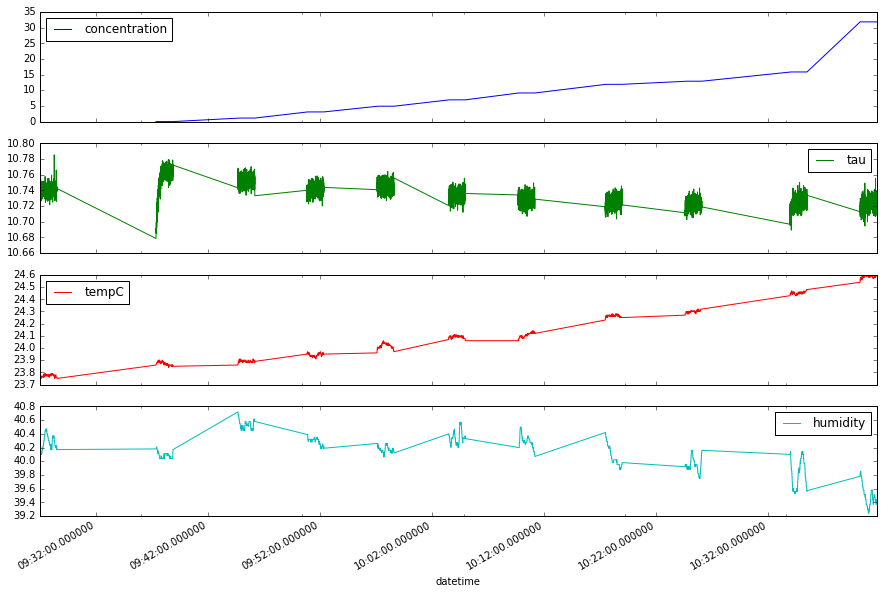

In [9]:
df_plot.plot(subplots=True, layout=(-1, 1), figsize=(15, 10), sharex=True)
fig.autofmt_xdate()
plt.ticklabel_format(useOffset=False, axis='y')
plt.savefig("Data/" + sample + '/overview.png', dpi=1000)